In [1]:
Rover1Data = Import["RV1-red2.txt", "Data"];

In [2]:
Dimensions[Rover1Data]

{1256, 2}

2.26348     -4.34219

1.19462     -4.34219

1.19462     -4.34219

0.188623    -2.44944

-0.880243   -2.44944
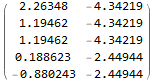

In [3]:
Rover1Data[[1;;5]] //  MatrixForm

-Graphics-
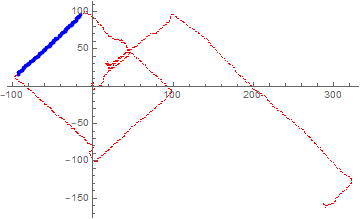

In [4]:
Show[ListPlot[Rover1Data, PlotStyle -> Red],
    ListPlot[Rover1Data[[315;;400]], PlotStyle -> Blue],
    PlotRange -> All]

In [5]:
Rover1LineInPark = Rover1Data[[315;;400]];

-15.5296   95.8623

-16.5985   93.9695

-17.6673   93.9695

-17.6673   92.1881

-18.6733   92.1881
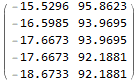

In [6]:
Rover1LineInPark[[1;;5]] // MatrixForm

# МНК

In [7]:
LSline = Fit[Rover1LineInPark, {x, 1}, x]

109.011 + 0.994911 x

-Graphics-
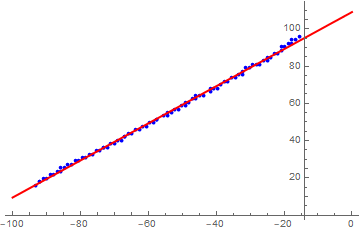

In [8]:
Show[ListPlot[Rover1Data[[315;;400]], PlotStyle -> Blue],
    Plot[LSline, {x, -100, 0}, PlotStyle -> {Thickness[0.007], Red}],
    PlotRange -> All]

# РНК

In [9]:
{u, s, v} = SingularValueDecomposition[Rover1LineInPark];

In [10]:
v // MatrixForm

-0.69602   0.718022

0.718022   0.69602

716.73   0.

0.       300.78

0.       0.
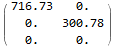

In [11]:
s[[1;;3]] // MatrixForm

In [12]:
a1 = - v[[2]][[1]] / v[[2]][[2]]

-1.03161

In [13]:
a2 = - Mean[Transpose[Rover1LineInPark][[1]]*a1 + Transpose[Rover1LineInPark][[2]]]

-110.99

-Graphics-
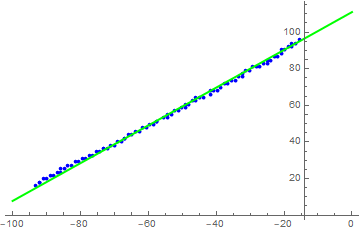

In [14]:
Show[ListPlot[Rover1Data[[315;;400]], PlotStyle -> Blue],
    Plot[- a2 - x*a1, {x, -100, 0}, PlotStyle -> {Thickness[0.007], Green}],
    PlotRange -> All]

# МНК и РНК

Legended[Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>        AbsoluteThickness[1.6], Thickness[0.005], RGBColor[1, 0, 0]]}, 
 
>      {МНК, RGBColor[1, 0, 0]}, LegendMarkers -> None, LabelStyle -> {}, 
 
>      LegendLayout -> Column], After, Identity]], 
 
>   Placed[LineLegend[{Directive[Opacity[1.], AbsoluteThickness[1.6], Thickness[0.005], 
 
>       RGBColor[0, 1, 0]]}, {РНК, RGBColor[0, 1, 0]}, LegendMarkers -> None, 
 
>     LabelStyle -> {}, LegendLayout -> Column], After, Identity]]
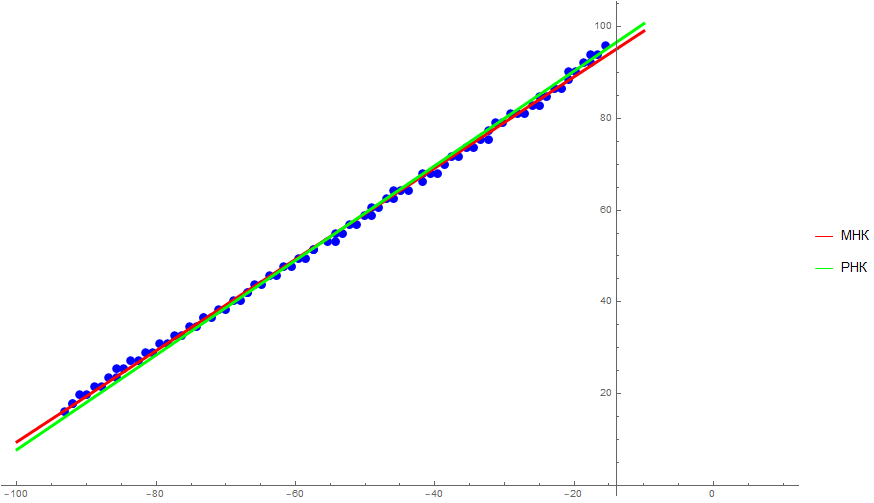

In [15]:
Show[ListPlot[Rover1Data[[315;;400]], PlotStyle -> Blue],
    Plot[LSline, {x, -100, -10}, PlotStyle -> {Thickness[0.005], Red}, PlotLegends -> {"МНК", Red}],
    Plot[- a2 - x*a1, {x, -100, -10}, PlotStyle -> {Thickness[0.005], Green}, PlotLegends -> {"РНК", Green}],
    PlotRange -> {{-100, 10}, {0, 100}}, ImageSize -> 800]

In [16]:
deltaAngle = - a1 - LSline[[2]][[1]]

0.0366996

In [17]:
deltaAngleInForm = {Floor[deltaAngle*180/Pi],
                Floor[Mod[deltaAngle*180/Pi, 1]*60],
                Mod[Mod[deltaAngle*180/Pi, 1]*60, 1]*60}

{2, 6, 9.83998}

# std МНК

In [18]:
inDistMHK = {}

{}

In [19]:
For[i = 1, i <= Dimensions[Rover1LineInPark][[1]], i++, 
            AppendTo[inDistMHK, {EuclideanDistance[Rover1LineInPark[[i]], 
            {Rover1LineInPark[[i]][[1]], LSline[[1]] + Rover1LineInPark[[i]][[1]]*LSline[[2]][[1]]}]}]]

In [20]:
Sqrt[Max[inDistMHK]]

1.59242

# std РНК

In [21]:
inDistPHK = {}

{}

In [22]:
For[i = 1, i <= Dimensions[Rover1LineInPark][[1]], i++, 
            AppendTo[inDistPHK, {EuclideanDistance[Rover1LineInPark[[i]], 
            {Rover1LineInPark[[i]][[1]], - a2 - Rover1LineInPark[[i]][[1]]*a1}]}]]

In [23]:
Sqrt[Max[inDistPHK]]

1.69324

In [24]:
BaseData = Import["BS-red2.txt", "Data"];

In [25]:
Dimensions[BaseData]

{1256, 2}

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888

1.19461   4.89888
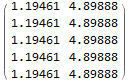

In [26]:
BaseData[[36;;906]][[1;;5]] // MatrixForm

-Graphics-
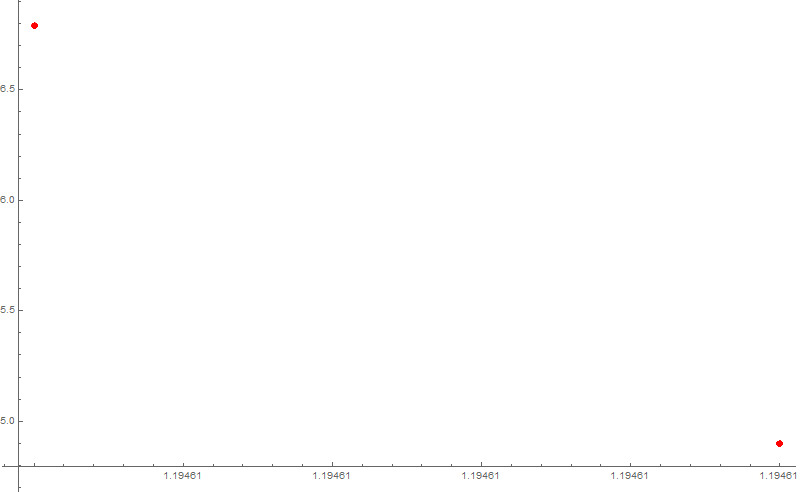

In [27]:
Show[ListPlot[BaseData[[36;;906]], PlotStyle -> Red], ImageSize -> 800]